# Building Basic Weather-Based Linear Regression Models for Rice Yield

This is a quick and dirty linear regression analysis on some of the data in the file "Crop Yield - consolidated data.xls". I began by opening up this file in Excel and saved the worksheet "Sheet2" as a CSV file (This worksheet contains data for Bangladesh, Brazil, China, India, Indonesia and Vietnam). I then read this CSV file (Sheet2.csv) into a dataframe and renamed the dataframe columns as follows: 

In [2]:
df = read.csv("./Data/Sheet2.csv")
orig.names = names(df)
names(df) = c("country","year","avg.harvested.area","avg.production","avg.yield","annual.consumption","cpi","consumption.per.capita","irrigatible.area","area","export.quantity","export.value","import.value","import.quantity","avg.temp.q1","avg.temp.q2","avg.temp.q3","avg.temp.q4","avg.rainfall.q1","avg.rainfall.q2","avg.rainfall.q3","avg.rainfall.q4","avg.annual.humidity")


I then extracted the data for the years 2000-2018 for four countries (Brazil and Vietnam had very little weather data, so I have ignored them here)

In [107]:
bangladesh = subset(df,country=="BANGLADESH")
china = subset(df,country=="CHINA")
india = subset(df,country=="INDIA")
indonesia = subset(df,country=="INDONESIA")

In the plots below, we can see how the annual average rice yield has progressively increased in all four countries since 2000 (though there are signs of plateauing in recent years). The rice yield is thus clearly a very strong function of time. As such, the year will be a necessary and essential variable in the regression models we will build.

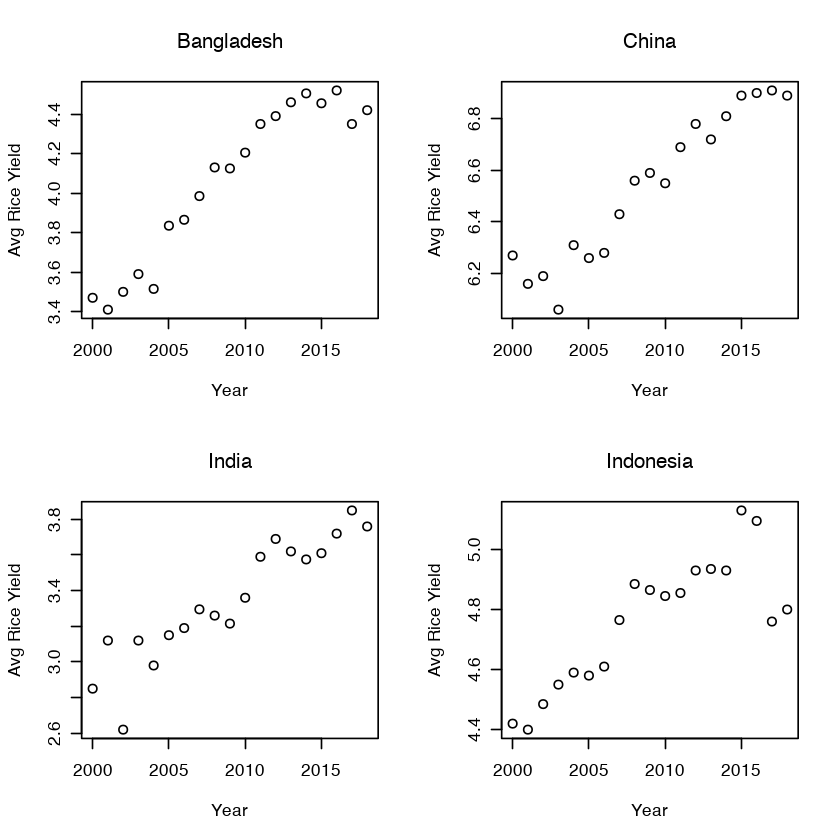

In [8]:
#library(repr)
#options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(2,2)) 
plot(bangladesh$year,bangladesh$avg.yield,xlab='Year',ylab='Avg Rice Yield',main='Bangladesh')
plot(china$year,china$avg.yield,xlab='Year',ylab='Avg Rice Yield',main='China')
plot(india$year,india$avg.yield,xlab='Year',ylab='Avg Rice Yield',main='India')
plot(indonesia$year,indonesia$avg.yield,xlab='Year',ylab='Avg Rice Yield',main='Indonesia')

# Building Linear Regression Models

For each of the four countries, I built a regression model by applying the backward selection algorithm. That is, I began with a model containing ALL the weather variables

avg.yield ~ year + avg.temp.q1 + avg.temp.q2 + avg.temp.q3 + avg.temp.q4 + avg.rainfall.q1 + avg.rainfall.q2 + avg.rainfall.q3 + avg.rainfall.q4 + avg.annual.humidity

and sequentially eliminated the variable with the largest p-value until I was left with a model where all the variables had a p-value < 0.05. Below I show the models I ended up with for each country. A summary of these results is given at the end of this document.

# Bangladesh

In [65]:
model2 = lm(avg.yield ~ year + avg.temp.q2 + avg.rainfall.q3 + avg.annual.humidity, data=bangladesh)
summary(model2)



Call:
lm(formula = avg.yield ~ year + avg.temp.q2 + avg.rainfall.q3 + 
    avg.annual.humidity, data = bangladesh)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.060304 -0.036866  0.003056  0.033679  0.104649 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.395e+02  6.108e+00 -22.838 2.95e-11 ***
year                 6.940e-02  3.231e-03  21.477 6.06e-11 ***
avg.temp.q2          1.348e-01  4.089e-02   3.297 0.006375 ** 
avg.rainfall.q3      4.749e-04  1.727e-04   2.750 0.017600 *  
avg.annual.humidity  4.513e-03  9.260e-04   4.874 0.000383 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05374 on 12 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9868,	Adjusted R-squared:  0.9823 
F-statistic: 223.4 on 4 and 12 DF,  p-value: 3.741e-11


# China

In [62]:
model2 = lm(avg.yield ~ year + avg.temp.q2 + avg.rainfall.q2 + avg.rainfall.q4, data=china)
summary(model2)



Call:
lm(formula = avg.yield ~ year + avg.temp.q2 + avg.rainfall.q2 + 
    avg.rainfall.q4, data = china)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.086788 -0.014041  0.003187  0.034596  0.059839 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -90.837449   5.135535 -17.688 5.82e-10 ***
year              0.047910   0.002522  18.995 2.54e-10 ***
avg.temp.q2       0.106251   0.038123   2.787  0.01643 *  
avg.rainfall.q2  -0.010762   0.002787  -3.861  0.00226 ** 
avg.rainfall.q4   0.019963   0.004263   4.683  0.00053 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04772 on 12 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.977,	Adjusted R-squared:  0.9694 
F-statistic: 127.7 on 4 and 12 DF,  p-value: 1.004e-09


# India

In [74]:
model2 = lm(avg.yield ~ year + avg.rainfall.q3 + avg.annual.humidity, data=india)
summary(model2)



Call:
lm(formula = avg.yield ~ year + avg.rainfall.q3 + avg.annual.humidity, 
    data = india)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.153868 -0.051807 -0.002117  0.032811  0.231572 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -88.319290  12.374687  -7.137 7.62e-06 ***
year                  0.045262   0.006239   7.254 6.42e-06 ***
avg.rainfall.q3       0.003831   0.001214   3.154  0.00761 ** 
avg.annual.humidity  -0.003279   0.001396  -2.349  0.03531 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1005 on 13 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9161,	Adjusted R-squared:  0.8967 
F-statistic:  47.3 on 3 and 13 DF,  p-value: 2.962e-07


# Indonesia

In [84]:
model2 = lm(avg.yield ~ year, data=indonesia)
summary(model2)



Call:
lm(formula = avg.yield ~ year, data = indonesia)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25589 -0.05113  0.01026  0.07200  0.17821 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -59.63426   10.10587  -5.901 1.74e-05 ***
year          0.03205    0.00503   6.372 6.95e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1201 on 17 degrees of freedom
Multiple R-squared:  0.7049,	Adjusted R-squared:  0.6875 
F-statistic:  40.6 on 1 and 17 DF,  p-value: 6.954e-06


# Summary

Here are the models that were built for each country:

### Bangladesh:

avg.yield ~ year + avg.temp.q2 + avg.rainfall.q3 + avg.annual.humidity

### China:

avg.yield ~ year + avg.temp.q2 + avg.rainfall.q2 + avg.rainfall.q4

### India:

avg.yield ~ year + avg.rainfall.q3 + avg.annual.humidity

### Indonesia:

avg.yield ~ year


We can see that of the weather variables, rainfall is a feature in all countries with the exception of Indonesia (where surprisingly it appears that the weather data does not appear correlated to rice yield!)